In [234]:
import pandas as pd
np=pd.np
from sdd_api.api import Api
from credentials import *
import matplotlib.pyplot as plt
%matplotlib inline
api = Api(username=username, password=password, client_id=client_id, client_secret=client_secret)

# Overview  
For now, this notebook just covers how to use our new drives and game info tables. In the future we'll add more advanced commands and datasets

## Drives

In [252]:
drives=api.get_dataframe('drives')
drives.sample(4)

,drive_num,end_event,net_yds,num_plays,quarter,start_at,time_start,time_total,matchup_id,season,team_name,drive_time
6516,1,Punt,0,3,1,NaN,15:00,1:54,20171112NYJ@TB,2017,NYJ,114
4612,3,Field Goal,89,13,1,NaN,08:31,7:10,20171005NE@TB,2017,NE,430
1005,1,Punt,8,3,1,NaN,10:32,1:53,20161002NO@LAC,2016,LAC,113
6843,2,Punt,32,5,1,NaN,03:16,1:55,20171119PHI@DAL,2017,PHI,115


In [236]:
#Calculate time of position and 
drive_features=drives.groupby(["matchup_id","team_name"], as_index=False).agg(sum)[['team_name','matchup_id','drive_time','num_plays','net_yds']]
drive_features['drive_time(m)']=drive_features['drive_time']/60
drive_features.sample(10)

,team_name,matchup_id,drive_time,num_plays,net_yds,drive_time(m)
524,OAK,20171105OAK@MIA,1856,60,370,30.933333
64,CIN,20160925DEN@CIN,1954,66,302,32.566667
364,BUF,20171001BUF@ATL,1725,62,247,28.750000
55,CAR,20160918SF@CAR,2260,92,540,37.666667
65,GB,20160925DET@GB,1493,52,375,24.883333
379,NYG,20171001NYG@TB,2053,80,398,34.216667
72,SEA,20160925SF@SEA,2157,68,393,35.950000
2,NYJ,20160101BUF@NYJ,1887,65,310,31.450000
238,NYG,20161218DET@NYG,1816,65,290,30.266667
139,DEN,20161030LAC@DEN,1612,66,313,26.866667


In [237]:
drive_features['yards_per_play']=drive_features['net_yds']/drive_features['num_plays']
drive_features.groupby("team_name").agg([np.min, np.max, np.median,np.average])[['yards_per_play','drive_time(m)']]

yards_per_play                               drive_time(m)  \
                    amin      amax    median   average          amin   
team_name                                                              
ARI             3.770833  7.220588  5.114754  5.311421     20.983333   
ATL             5.151515  8.161765  6.112676  6.285448     25.600000   
BAL             3.388060  6.633803  4.457143  4.563542     23.366667   
BUF             2.923077  7.185185  4.979592  4.971352     20.516667   
CAR             3.214286  7.638889  4.658537  4.886686     27.250000   
CHI             2.411765  7.059701  4.983333  4.986167     22.616667   
CIN             3.607843  8.578125  4.951613  5.152487     19.766667   
CLE             3.285714  5.847222  4.775862  4.643493     23.083333   
DAL             3.484848  7.452830  5.795329  5.577417     23.750000   
DEN             3.015873  6.112360  5.071429  4.846970     24.100000   
DET             3.394366  6.469136  5.000000  5.192022     24.616667   
GB              3.388060  7.211538  5.388406  5.354972     23.083333   
HOU             3.579710  7.549296  4.919439  5.106302     21.716667   
IND             3.164179  6.571429  5.128571  5.003969     23.916667   
JAC             3.037037  7.895522  4.928571  4.970857     25.350000   
KC              3.000000  8.151515  5.660746  5.486221     23.350000   
LAC             4.291667  7.777778  5.472727  5.593084     20.700000   
LAR             2.114754  7.343750  5.360656  5.066442     22.633333   
MIA             2.833333  6.523810  4.880597  4.879072     23.866667   
MIN             3.566667  7.569231  5.206897  5.255258     22.966667   
NE              4.207547  7.454545  5.924675  5.903247     23.816667   
NO              4.202703  8.188406  6.114754  6.238348     20.633333   
NYG             2.508772  6.787879  4.772727  4.870573     22.466667   
NYJ             3.491228  5.972603  5.000000  4.934155     21.600000   
OAK             2.120000  7.518519  5.492537  5.406834     21.900000   
PHI             3.553571  6.890625  5.329545  5.321847     25.500000   
PIT             4.362319  7.875000  5.335490  5.665883     25.383333   
SEA             3.183099  7.272727  5.366422  5.407370     19.716667   
SF              3.400000  7.627119  4.774648  4.849062     23.033333   
TB              2.790323  6.575758  4.786667  4.959148     22.233333   
TEN             2.525424  7.515625  5.278689  5.206833     20.316667   
WAS             3.716667  8.109375  5.602740  5.665387     22.850000   

                                            
                amax     median    average  
team_name                                   
ARI        46.350000  32.150000  31.388596  
ATL        36.250000  31.866667  31.257937  
BAL        38.600000  32.366667  31.542982  
BUF        40.550000  28.750000  28.866667  
CAR        38.883333  32.766667  33.069298  
CHI        38.850000  29.400000  29.864912  
CIN        41.066667  28.200000  29.290351  
CLE        36.250000  28.150000  28.771053  
DAL        37.483333  32.966667  31.676667  
DEN        38.333333  31.066667  31.456140  
DET        36.916667  30.400000  30.400000  
GB         39.600000  29.650000  30.360000  
HOU        41.416667  32.141667  32.191667  
IND        37.283333  30.033333  30.083333  
JAC        41.850000  31.983333  32.067544  
KC         38.283333  30.391667  30.957500  
LAC        42.533333  29.866667  30.897368  
LAR        39.016667  30.533333  31.150877  
MIA        37.033333  29.200000  29.933333  
MIN        39.783333  33.100000  32.640351  
NE         37.950000  29.741667  30.754545  
NO         41.383333  31.383333  31.036842  
NYG        34.216667  29.500000  28.672807  
NYJ        36.616667  30.050000  30.544737  
OAK        41.466667  30.933333  30.342105  
PHI        40.533333  35.416667  33.851754  
PIT        36.650000  32.116667  31.531667  
SEA        37.483333  31.791667  31.545000  
SF         34.450000  29.000000  28.538596  
TB         41.150000  30.533333  30.485965  
TEN 

### Taking Drive Features and Creating In Season Stats

In [238]:
team_game_logs=api.get_dataframe("team_game_logs")

In [239]:
team_game_logs=team_game_logs[(team_game_logs['game_type']=='Regular')&(team_game_logs['season']==2016)]

In [241]:
#we're working to add matchup id and ensure the api knows the proper format.
#for now use this
def matchup_id(row):
    if row['game_location'] is None:
        home_name=row['team_name']
        away_name=row['opp_name']
    else:
        home_name=row['opp_name']
        away_name=row['team_name']
    return str(row['season'])+row['game_datetime'].strftime("%m%d")+"%s@%s"%(away_name, home_name)
team_game_logs['game_datetime']=pd.to_datetime(team_game_logs['game_datetime'])
team_game_logs['matchup_id']=team_game_logs.apply(matchup_id, axis=1)

In [242]:
team_features=[]
#we'll create team level stats past on current season performance
for team_name, team_games in team_game_logs.groupby(["team_name"]):
    for week_num in team_games['week_num'].unique():
        if week_num==1:
            continue#could handle using last season stats
        in_season_games=team_games[team_games['week_num']<week_num]
        matchup_ids=in_season_games['matchup_id'].unique()
        team_drives=drives[(drives['matchup_id'].isin(matchup_ids))&(drives['team_name']==team_name)]
        
        features={}
        drive_agg=team_drives.agg([np.mean,np.sum])
        features['average_drive_time']=drive_agg.loc['mean']['drive_time']
        totals=team_drives.agg(np.sum)
        features['time_of_posession']=totals['drive_time']
        features['yards_per_play']=totals['net_yds']/totals['num_plays']
        features['matchup_id']=team_games[team_games['week_num']==week_num]['matchup_id'].iloc[0]
        features['team_name']=team_name
        team_features.append(features)
team_features_df=pd.DataFrame(team_features)
team_features_df.sample(10)

,average_drive_time,matchup_id,team_name,time_of_posession,yards_per_play
458,160.362069,20161113GB@TEN,TEN,9301.0,5.865854
338,139.677419,20161120CHI@NYG,NYG,8660.0,5.864706
302,156.960000,20161002BUF@NE,NE,3924.0,5.384058
408,169.160000,20161016ATL@SEA,SEA,4229.0,4.851351
197,169.409091,20161002IND@JAC,IND,3727.0,6.240876
278,159.163934,20161120MIA@LAR,MIA,9709.0,5.574924
157,195.055556,20161106DET@MIN,DET,7022.0,5.235537
218,155.210526,20161120JAC@DET,JAC,8847.0,4.729651
372,162.109756,20161218OAK@LAC,OAK,13293.0,5.734990
337,138.306122,20161114CIN@NYG,NYG,6777.0,6.074627


You can take "team_features_df" and merge with the matchups table to make predictions. You can also add home/away information by using the team_game_logs table or the matchups table

### Game Info  
We've added a game info table. For now it just contains weather and grass information.

In [243]:
game_info=api.get_dataframe("game_info")
game_info.sample(10)

,surface,humidity,temperature,wind,matchup_id
192,field_turf,63.0,60.0,10.0,20111127BUF@NYJ
925,field_turf,53.0,54.0,14.0,20141026CHI@NE
1538,sport_turf,NaN,NaN,NaN,20161127LAR@NO
158,grass,27.0,69.0,5.0,20111110OAK@LAC
283,grass,79.0,83.0,15.0,20120909CAR@TB
1043,sport_turf,NaN,NaN,NaN,20141221ATL@NO
1189,field_turf,30.0,49.0,16.0,20151018WAS@NYJ
816,field_turf,52.0,71.0,11.0,20140904GB@SEA
1368,grass,12.0,85.0,10.0,20160908CAR@DEN
113,grass,48.0,56.0,11.0,20111016MIN@CHI


We're going to show how you can use this data to see which team plays in the coldest weather.

In [244]:
team_games_with_weather=team_game_logs.merge(game_info)
team_games_with_weather

,season,team_name,full_game_type,opp_first_downs,team_first_downs,game_location,game_outcome,game_time,opp_pass_yds,team_pass_yds,...,game_type,week_num,opp_name,had_overtime,game_datetime,matchup_id,surface,humidity,temperature,wind
0,2016,ARI,Week 1,19.0,21.0,None,L,7:30PM ET,257.0,252.0,...,Regular,1,NE,False,2016-09-11 19:30:00,20160911NE@ARI,grass,NaN,NaN,NaN
1,2016,NE,Week 1,21.0,19.0,@,W,7:30PM ET,252.0,257.0,...,Regular,1,ARI,False,2016-09-11 19:30:00,20160911NE@ARI,grass,NaN,NaN,NaN
2,2016,ATL,Week 1,20.0,19.0,None,L,1:05PM ET,281.0,322.0,...,Regular,1,TB,False,2016-09-11 13:05:00,20160911TB@ATL,field_turf,NaN,NaN,NaN
3,2016,TB,Week 1,19.0,20.0,@,W,1:05PM ET,322.0,281.0,...,Regular,1,ATL,False,2016-09-11 13:05:00,20160911TB@ATL,field_turf,NaN,NaN,NaN
4,2016,BAL,Week 1,11.0,18.0,None,W,1:04PM ET,95.0,225.0,...,Regular,1,BUF,False,2016-09-11 13:04:00,20160911BUF@BAL,grass,44.0,84.0,8.0
5,2016,BUF,Week 1,18.0,11.0,@,L,1:04PM ET,225.0,95.0,...,Regular,1,BAL,False,2016-09-11 13:04:00,20160911BUF@BAL,grass,44.0,84.0,8.0
6,2016,CAR,Week 1,21.0,21.0,@,L,8:40PM ET,159.0,176.0,...,Regular,1,DEN,False,2016-09-08 20:40:00,20160908CAR@DEN,grass,12.0,85.0,10.0
7,2016,DEN,Week 1,21.0,21.0,None,W,8:40PM ET,176.0,159.0,...,Regular,1,CAR,False,2016-09-08 20:40:00,20160908CAR@DEN,grass,12.0,85.0,10.0
8,2016,CHI,Week 1,17.0,14.0,@,L,1:05PM ET,215.0,185.0,...,Regular,1,HOU,False,2016-09-11 13:05:00,20160911CHI@HOU,field_turf,NaN,NaN,NaN
9,2016,HOU,Week 1,14.0,17.0,None,W,1:05PM ET,185.0,215.0,...,Regular,1,CHI,False,2016-09-11 13:05:00,20160911CHI@HOU,field_turf,NaN,NaN,NaN


In [245]:
weather_stats=team_games_with_weather[['team_name','humidity','temperature','wind']].groupby("team_name").agg([np.mean,np.min,np.max])
weather_stats

humidity             temperature                   wind           
                mean amin   amax        mean  amin  amax       mean amin  amax
team_name                                                                     
ARI        25.166667  0.0   53.0   66.500000  39.0  85.0   9.666667  5.0  16.0
ATL        22.857143  1.0   83.0   65.714286  54.0  79.0   7.333333  5.0  10.0
BAL        26.857143  0.0   84.0   59.214286  31.0  88.0   7.833333  2.0  16.0
BUF        33.750000  4.0   92.0   55.500000  26.0  91.0  10.125000  5.0  22.0
CAR        19.857143  2.0   63.0   63.071429  32.0  85.0   5.200000  0.0  10.0
CHI        35.454545  1.0   93.0   51.181818  11.0  84.0   8.000000  5.0  12.0
CIN        36.500000  2.0   90.0   53.928571  24.0  81.0   6.714286  2.0  17.0
CLE        38.937500  1.0   91.0   55.750000  26.0  86.0  10.125000  1.0  16.0
DAL        29.857143  0.0   65.0   59.142857  32.0  81.0   8.000000  6.0  10.0
DEN        21.933333  5.0   63.0   64.866667  18.0  88.0   6.125000  3.0  10.0
DET        56.333333  1.0   84.0   63.000000  55.0  72.0  11.500000  6.0  17.0
GB         26.000000  0.0   84.0   49.384615  11.0  90.0   9.000000  3.0  17.0
HOU        18.000000  6.0   60.0   59.166667  32.0  71.0   4.500000  4.0   5.0
IND        24.333333  6.0   59.0   62.500000  45.0  85.0   5.333333  4.0   7.0
JAC        33.307692  0.0   93.0   70.000000  42.0  90.0   5.857143  3.0   8.0
KC         31.923077  5.0  100.0   50.615385   1.0  74.0   7.800000  6.0   9.0
LAC        27.230769  5.0   73.0   67.692308  37.0  85.0   7.666667  6.0   9.0
LAR        20.307692  0.0   61.0   65.307692  36.0  91.0   8.200000  3.0  17.0
MIA        34.437500  3.0   79.0   70.125000  35.0  88.0  10.142857  2.0  16.0
MIN        35.285714  5.0   71.0   63.142857  37.0  80.0   9.250000  0.0  20.0
NE         35.666667  3.0   92.0   53.400000  18.0  80.0  10.000000  4.0  14.0
NO         34.833333  0.0   74.0   72.333333  63.0  80.0   7.333333  5.0   9.0
NYG        25.071429  0.0   74.0   52.928571  32.0  80.0   6.400000  2.0  12.0
NYJ        33.071429  5.0   91.0   55.714286  35.0  80.0  10.166667  0.0  17.0
OAK        31.466667  4.0  100.0   63.266667  21.0  89.0   6.428571  2.0  15.0
PHI        21.285714  3.0   62.0   58.357143  35.0  85.0  11.800000  5.0  20.0
PIT        39.066667  1.0   86.0   54.466667  24.0  81.0   8.285714  4.0  15.0
SEA        26.357143  2.0   83.0   54.357143  26.0  88.0   4.200000  0.0  10.0
SF         30.428571  0.0   63.0   65.000000  33.0  82.0  11.428571  4.0  22.0
TB         25.166667  2.0   63.0   76.250000  46.0  91.0   7.600000  4.0  15.0
TEN        29.923077  3.0   78.0   62.230769   1.0  89.0   6.666667  2.0  15.0
WAS        36.923077  1.0   90.0   56.307692  32.0  81.0   6.285714  1.0  16.0

In [246]:
#pandas has a great rank function that ranks a dataframe in ascending order.
weather_rankings=weather_stats.rank()
weather_rankings

humidity             temperature              wind            
              mean  amin  amax        mean  amin  amax  mean  amin  amax
team_name                                                               
ARI            9.5   5.0   1.0        27.0  26.0  18.0  24.0  25.5  21.0
ATL            6.0  12.5  17.5        26.0  30.0   4.0  12.5  25.5   9.0
BAL           13.0   5.0  20.0        16.0  13.0  23.5  17.0   9.5  21.0
BUF           22.0  24.5  27.5         9.0  11.0  31.0  26.5  25.5  31.5
CAR            2.0  17.5   7.5        20.0  16.0  18.0   3.0   2.5   9.0
CHI           26.0  12.5  29.5         3.0   3.5  15.0  18.5  25.5  12.5
CIN           28.0  17.5  23.5         6.0   8.5  11.5  11.0   9.5  26.0
CLE           30.0  12.5  25.5        11.0  11.0  21.0  26.5   5.5  21.0
DAL           15.0   5.0  10.0        14.0  16.0  11.5  18.5  30.5   9.0
DEN            5.0  28.0   7.5        23.0   5.5  23.5   6.0  14.5   9.0
DET           32.0  12.5  20.0        19.0  31.0   2.0  31.0  30.5  26.0
GB            11.0   5.0  20.0         1.0   3.5  28.5  22.0  14.5  26.0
HOU            1.0  31.5   3.0        15.0  16.0   1.0   2.0  19.5   1.0
IND            7.0  31.5   2.0        18.0  28.0  18.0   4.0  19.5   2.0
JAC           21.0   5.0  29.5        29.0  27.0  28.5   5.0  14.5   3.0
KC            19.0  28.0  31.5         2.0   1.5   3.0  16.0  30.5   5.0
LAC           14.0  28.0  12.0        28.0  24.5  18.0  15.0  30.5   5.0
LAR            3.0   5.0   4.0        25.0  23.0  31.0  20.0  14.5  26.0
MIA           23.0  21.5  16.0        30.0  21.0  23.5  28.0   9.5  21.0
MIN           25.0  28.0  11.0        21.0  24.5   7.0  23.0   2.5  29.5
NE            27.0  21.5  27.5         5.0   5.5   7.0  25.0  19.5  14.0
NO            24.0   5.0  13.5        31.0  32.0   7.0  12.5  25.5   5.0
NYG            8.0   5.0  13.5         4.0  16.0   7.0   8.0   9.5  12.5
NYJ           20.0  28.0  25.5        10.0  21.0   7.0  29.0   2.5  26.0
OAK           18.0  24.5  31.5        22.0   7.0  26.5   9.0   9.5  16.5
PHI            4.0  21.5   5.0        13.0  21.0  18.0  32.0  25.5  29.5
PIT           31.0  12.5  22.0         8.0   8.5  11.5  21.0  19.5  16.5
SEA           12.0  17.5  17.5         7.0  11.0  23.5   1.0   2.5   9.0
SF            17.0   5.0   7.5        24.0  19.0  14.0  30.0  19.5  31.5
TB             9.5  17.5   7.5        32.0  29.0  31.0  14.0  19.5  16.5
TEN           16.0  21.5  15.0        17.0   1.5  26.5  10.0   9.5  16.5
WAS           29.0  12.5  23.5        12.0  16.0  11.5   7.0   5.5  21.0

In [247]:
weather_rankings['wind']

,mean,amin,amax
team_name,,,
ARI,24.0,25.5,21.0
ATL,12.5,25.5,9.0
BAL,17.0,9.5,21.0
BUF,26.5,25.5,31.5
CAR,3.0,2.5,9.0
CHI,18.5,25.5,12.5
CIN,11.0,9.5,26.0
CLE,26.5,5.5,21.0
DAL,18.5,30.5,9.0


In [248]:
from IPython.display import display
def showRankings(col):
    bottom_5=weather_rankings[weather_rankings[col]['mean']<=5][col]
    top_5=weather_rankings[weather_rankings[col]['mean']>(weather_rankings[col]['mean'].max()-5)][col]
    combined=pd.concat([bottom_5, top_5])
    display(combined[['mean']].sort_values(by="mean").rename(columns={"mean": col}))
for col in['humidity','temperature','wind']:
    showRankings(col)

,humidity
team_name,
HOU,1.0
CAR,2.0
LAR,3.0
PHI,4.0
DEN,5.0
CIN,28.0
WAS,29.0
CLE,30.0
PIT,31.0


,temperature
team_name,
GB,1.0
KC,2.0
CHI,3.0
NYG,4.0
NE,5.0
LAC,28.0
JAC,29.0
MIA,30.0
NO,31.0


,wind
team_name,
SEA,1.0
HOU,2.0
CAR,3.0
IND,4.0
JAC,5.0
MIA,28.0
NYJ,29.0
SF,30.0
DET,31.0


Surprisingly, Chicago is 3rd and Kansas City is ranked 2nd for coldest. NOTE, this uses all games played, not just home games.

# Scoring vs Weather  


In [249]:
matchups=api.get_dataframe("matchups")
matchups['total_pts']=matchups['home_pts']+matchups['away_pts']
weather_matchups=matchups.merge(game_info)

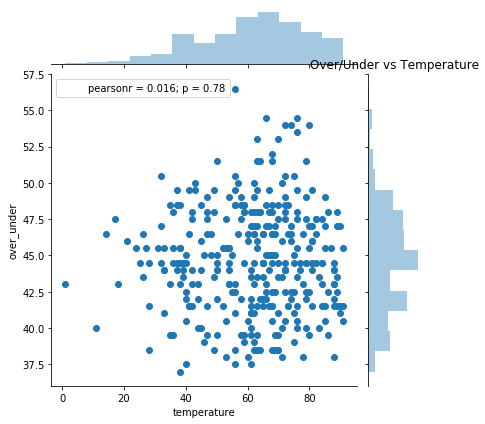

In [250]:
import seaborn as sns
sns.jointplot(data=weather_matchups, x="temperature", y="over_under")
plt.title("Over/Under vs Temperature")

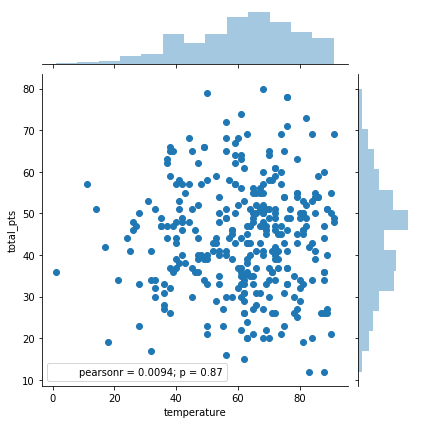

In [251]:
sns.jointplot(data=weather_matchups.dropna(subset=["temperature", "total_pts"]), x="temperature", y="total_pts")

There looks to be a small correlation but it's fuzzy at best. It would be better to look at "hardiness" of teams and see if weather makes them perform better or worse than their typical games without adjusting for weather. We'll leave the model building to you for now but may release a more comprehensive example soon!